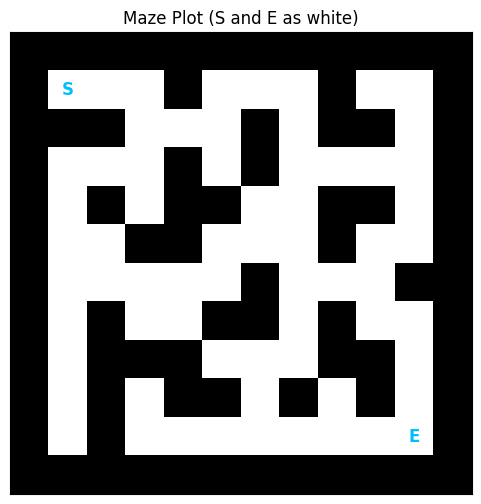

In [94]:
import pygad 
import numpy as np
import matplotlib.pyplot as plt

maze = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

maze_array = np.array(maze)

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(maze_array, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title("Maze Plot (S and E as white)")

plt.text(1, 1, 'S', ha='center', va='center', color='deepskyblue', fontsize=12, fontweight='bold')
plt.text(10, 10, 'E', ha='center', va='center', color='deepskyblue', fontsize=12, fontweight='bold')
# plt.savefig("board.png")
plt.show()

In [95]:
start = (1, 1)
end = (10, 10)

# chromosom: 30 ruchów
# fitness: odległość to końca (na początku na chama) - moze dijkstra?



In [96]:
from enum import Enum

class Direction(Enum):
    LEFT = 0
    UP = 1
    RIGHT = 2
    DOWN = 3 



In [97]:
def visualize_solution_path(maze, solution, start, end):
    x, y = start
    path = [(x, y)]

    for gene in solution:
        if gene == Direction.LEFT.value:
            new_x, new_y = x - 1, y
        elif gene == Direction.UP.value:
            new_x, new_y = x, y - 1
        elif gene == Direction.RIGHT.value:
            new_x, new_y = x + 1, y
        elif gene == Direction.DOWN.value:
            new_x, new_y = x, y + 1
        else:
            continue

        if 0 <= new_x < len(maze[0]) and 0 <= new_y < len(maze):
            if maze[new_y][new_x] == 1:
                x, y = new_x, new_y
                path.append((x, y))
            else:
                break  # Wpadł w ścianę
        else:
            break  # Wyszedł poza labirynt

    # Tworzymy obrazek labiryntu
    maze_array = np.array(maze)

    fig, ax = plt.subplots()
    ax.imshow(maze_array == 0, cmap='gray_r')

    # Rysujemy ścieżkę
    px, py = zip(*path)
    ax.plot(px, py, color='lime', linewidth=2, marker='o', label='Path')

    # Start i koniec
    ax.plot(start[0], start[1], "ro", label="Start")   # czerwony punkt
    ax.plot(end[0], end[1], "bo", label="End")         # niebieski punkt

    ax.set_title("Rozwiązanie labiryntu")
    ax.set_xticks(range(len(maze[0])))
    ax.set_yticks(range(len(maze)))
    ax.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
    ax.invert_yaxis()
    ax.legend()
    plt.show()



Najlepsze rozwiązanie: [2. 2. 3. 3. 0. 0. 3. 3. 3. 2. 2. 2. 2. 2. 1. 3. 2. 0. 0. 1. 0. 3. 0. 2.
 2. 0. 2. 0. 3. 2. 1. 2. 3. 3. 0. 2. 1. 0. 0. 3. 1. 3. 2. 0. 2. 1. 3. 2.
 1. 0.]
Najkrótszy dystans (fitness): 15


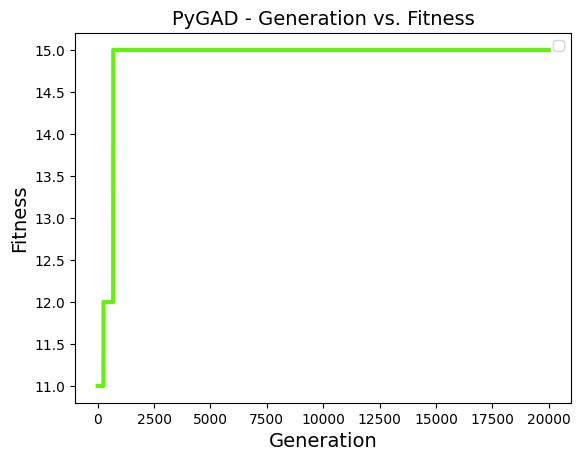

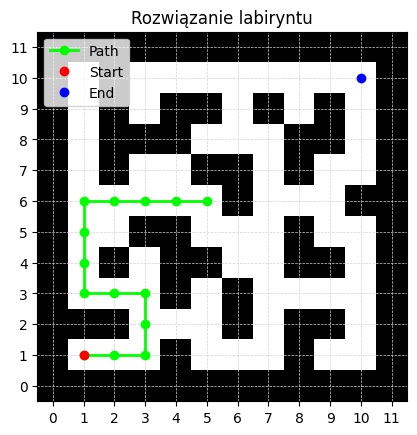

In [98]:
def manhattan_distance(stop, exit):
    return abs(stop[0] - exit[0]) + abs(stop[1] - exit[1])

def fitness_func(ga_instance, solution, solution_idx):
    x, y = start
    for gene in solution:
        if gene == Direction.LEFT.value:
            new_x, new_y = x - 1, y
        elif gene == Direction.UP.value:
            new_x, new_y = x, y - 1
        elif gene == Direction.RIGHT.value:
            new_x, new_y = x + 1, y
        elif gene == Direction.DOWN.value:
            new_x, new_y = x, y + 1
        else:
            continue

        if maze[new_y][new_x] == 1 | 0:
            x, y = new_x, new_y
        else:
            break  # ściana – koniec ścieżki

    distance = manhattan_distance((x,y), end)
    max_dist = len(maze) + len(maze[0])
    fitness = max_dist - distance
    return fitness

gene_space = [d.value for d in Direction]

ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=20000,
    num_parents_mating=10,
    fitness_func=fitness_func,
    sol_per_pop=30,
    num_genes=50,
    parent_selection_type="rank",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=11
)

ga_instance.run() 

# Wyniki
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Najlepsze rozwiązanie:", solution)
print("Najkrótszy dystans (fitness):", solution_fitness)

# Rysowanie wykresu
ga_instance.plot_fitness()

# Uruchomienie wizualizacji:
visualize_solution_path(maze, solution, start, end)
